In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Importing data set

In [2]:
data = pd.read_excel('netflix_titles.xlsx')
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24 00:00:00,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, Jos√© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24 00:00:00,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24 00:00:00,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24 00:00:00,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24 00:00:00,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
print(f"Dataset contains: {data.shape[0]} records")
print(f"It contains {data.shape[1]} features, namely: {', '.join(data.columns)}")

Dataset contains: 8807 records
It contains 12 features, namely: show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description


## Data cleaning

### Checking data types & non null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Changing 'date_added' to datetime type

In [5]:
data['date_added'] = pd.to_datetime(data['date_added'], errors = 'coerce')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Check number of missing values

In [6]:
null_count = data.isnull().sum()
print(f'Number of missing values: {null_count}')

Number of missing values: show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Since the number of missing values is not extreme, I will leave them as such for now and handle them later as needed

### Rename 'listed_in' to 'category'

In [7]:
data = data.rename(columns={'listed_in': 'category'})

### Now we can strip any leading/trailing spaces in any string values

In [8]:
data = data.map(lambda x : x.strip() if isinstance(x, str) else x)

In [9]:
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,category,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, Jos√© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### Director & cast has multiple entries so we need to seperate them before plotting

In [10]:
director_count = data['director'].str.split(', ').explode().value_counts().head(10)
cast_count = data['cast'].str.split(', ').explode().value_counts().head(10)
category_count = data['category'].str.split(', ').explode().value_counts()

### Data is ready for plotting

In [11]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

## Visualizations

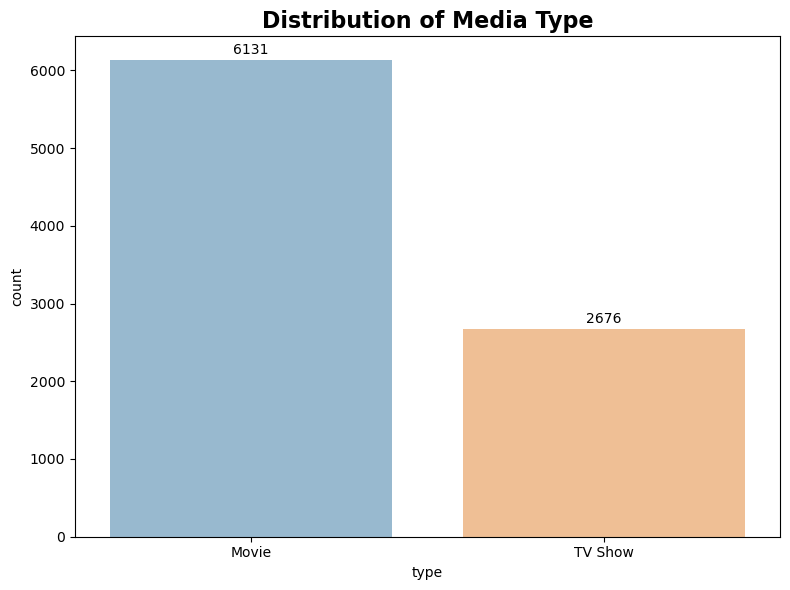

In [12]:
# Overall media type distribution

plt.figure(figsize=(8,6))

ax = sns.countplot(
    x='type',
    data = data, 
    alpha = 0.5, 
    hue='type')

plt.title("Distribution of Media Type", fontsize=16, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2, fontsize=10)
    
plt.tight_layout()
plt.show()

As seen in plot above, this dataset has significantly more movies than TV shows

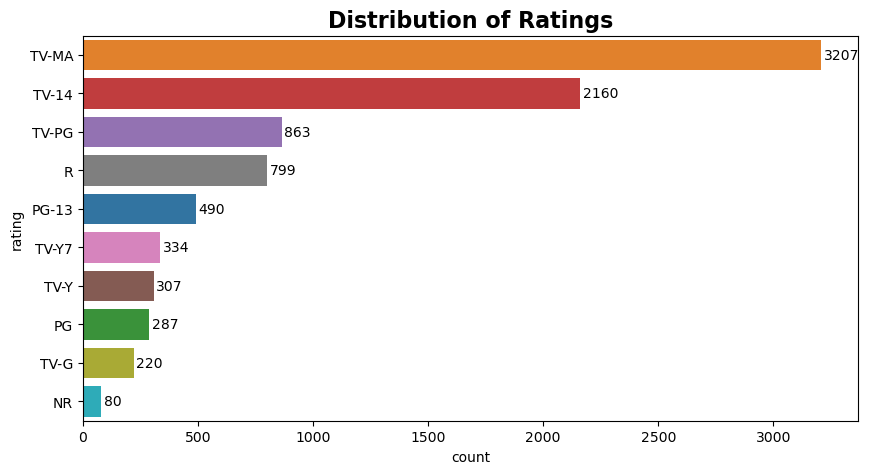

In [13]:
# Ratings Distribution on the platform

plt.figure(figsize=(10, 5))

top_ratings = data['rating'].value_counts().head(10).index

ax = sns.countplot(
    y='rating',
    data=data[data['rating'].isin(top_ratings)],
    order=top_ratings,
    hue='rating'
)

plt.title("Distribution of Ratings", fontsize=16, fontweight='bold')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2, fontsize=10)

plt.show()

As seen above, majority of content in the dataset is TV-MA and TV-14. 

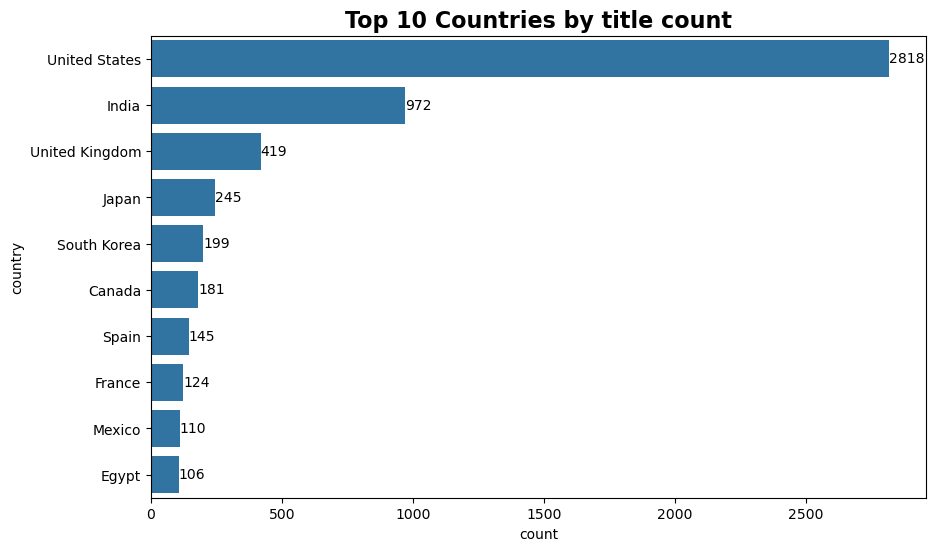

In [14]:
# Top countries producing movies/TV shows

plt.figure(figsize=(10, 6))

ax = sns.countplot(
    y='country', 
    data=data, 
    order=data['country'].value_counts().index[:10])

plt.title("Top 10 Countries by title count", fontsize=16, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

The figure above shows that United States leads with 2818 titles with India in distant second with 972 titles

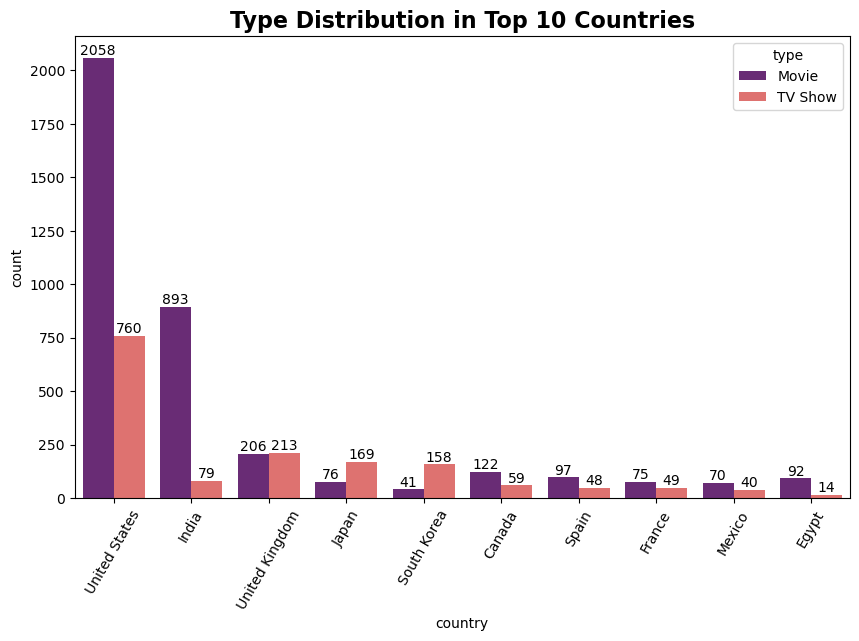

In [15]:
# Type distribution in top producing countries

plt.figure(figsize=(10, 6))
index_labels = list(data['country'].value_counts().head(10).index)

type_by_countries=data[data['country'].isin(index_labels)]

ax=sns.countplot(x='country',data=type_by_countries, palette='magma',hue='type', order=index_labels)
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=60)
plt.title("Type Distribution in Top 10 Countries", fontsize=16, fontweight='bold')
plt.show()

The plot above shows more movies being produced comapred to TV shows in majority of the top 10 countries

In [16]:
# Release year distribution on the platform

release_year_plot=(data['release_year']
                    .value_counts()
                    .nlargest(20)
                    .reset_index(name= 'count')
                    .rename(columns={'index': 'release_year'})
)
fig = px.line(release_year_plot.sort_values('release_year'), 
              y='count',
              x='release_year', 
              markers=True,
              title='Distribution of media produced by year',
              labels={'release_year': 'Year', 'count': 'Number of Titles'})

fig.show()

The plot above shows the year in which the media was produced, that's available on Netflix currently. The trend goes downward after 2020 significantly due to not enough new media produced because of covid-19 pandemic. This also indicates that with the advent of streaming services like Netflix, significantly more media is being produced now.

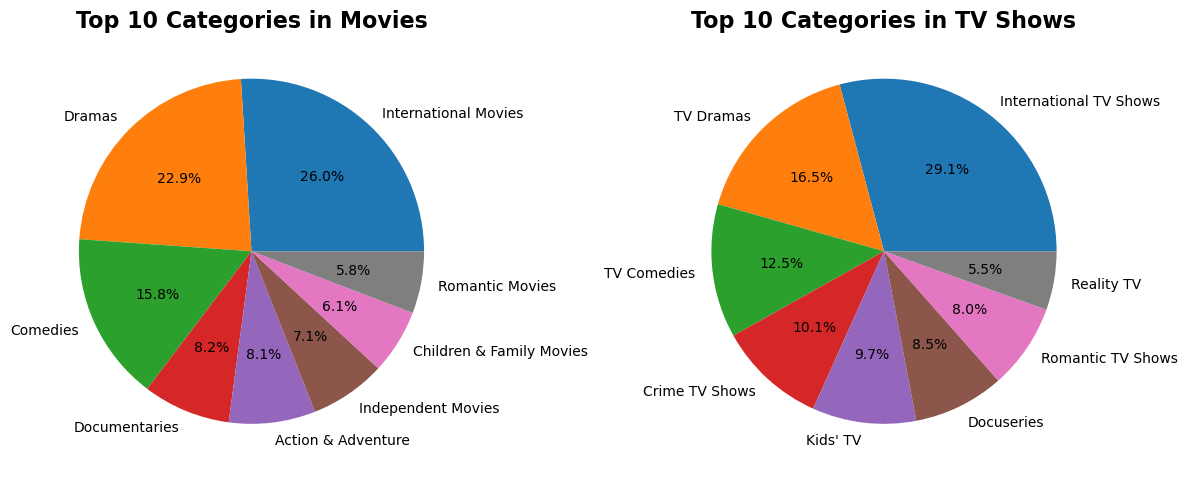

In [17]:
# Category distribution of media on the platfornm

# Movies
movie_categories = (
    data[data['type'] == 'Movie']['category']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(8)
)

# TV shows
tv_categories = (
    data[data['type'] == 'TV Show']['category']
    .str.split(', ')
    .explode()
    .value_counts()
    .head(8)
)

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Pie chart for Movies
ax[0].pie(movie_categories.values, labels=movie_categories.index, autopct='%1.1f%%')
ax[0].set_title('Top 10 Categories in Movies', fontsize= 16, fontweight= 'bold')

# Pie chart for TV Shows
ax[1].pie(tv_categories.values, labels=tv_categories.index, autopct='%1.1f%%')
ax[1].set_title('Top 10 Categories in TV Shows', fontsize= 16, fontweight= 'bold')

plt.tight_layout()
plt.show()

The biggest category being International movies and TV drama explains why Netflix has invested so much in foreign made media. They've had lot of success with these investments.

### Now we finally drop all missing values from below columns

In [18]:
#data = data.dropna(subset=['director', 'cast', 'country'])

/var/folders/l5/7wkdfd8s1ds9m7fptfxlcv_m0000gn/T/ipykernel_31678/3966626257.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/l5/7wkdfd8s1ds9m7fptfxlcv_m0000gn/T/ipykernel_31678/3966626257.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




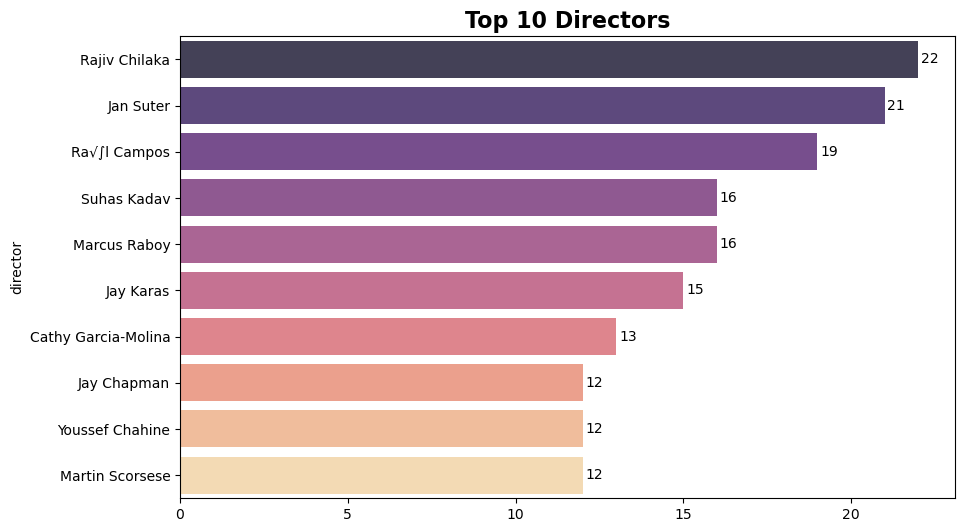

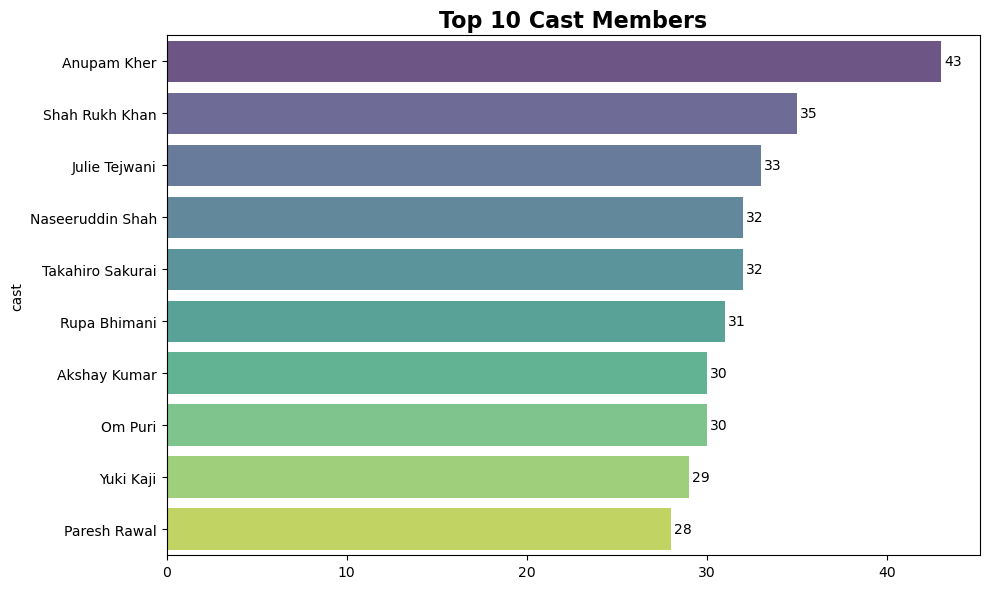

In [19]:
# Top 10 directors & cast members overall

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=director_count.values, 
    y=director_count.index, 
    alpha=0.8, 
    palette='magma')

plt.title('Top 10 Directors', fontsize=16, fontweight= 'bold')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)
    
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=cast_count.values, 
    y=cast_count.index, 
    alpha=0.8, 
    palette='viridis')

plt.title('Top 10 Cast Members', fontsize=16, fontweight= 'bold')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

plt.tight_layout()
plt.show()

The figures above show a varied roster of cast & directors across nations showing the wide variety of talent on the platform.

In [20]:
# Distribution of movie releases per genre yearly

data['category'] = data['category'].str.split(', ')
data = data.explode('category')

# Movies
movies = data.loc[data['type'] == 'Movie']

# Top 5 movie genres
top_movie_genres = (
                movies['category']
                .value_counts()
                .nlargest(5).
                index
)
movies = movies[movies['category'].isin(top_movie_genres)]

movies_grouped = (
            movies.groupby(['release_year', 'category'])
            .size()
            .reset_index(name='count')
)

fig_movies = px.line(
    movies_grouped,
    x='release_year',
    y='count',
    color='category',
    markers=True,
    title='Top 5 Movie Genres Over Time',
    labels={'release_year': 'Year', 'count': 'Number of Releases', 'category': 'Genre'}
)

fig_movies.show()

# TV Shows
tv_shows = data.loc[data['type'] == 'TV Show']

# Top 5 TV show genres
top_tv_genres = (
            tv_shows['category']
            .value_counts()
            .nlargest(5)
            .index
)
tv_shows = tv_shows[tv_shows['category'].isin(top_tv_genres)]

tv_grouped = (
        tv_shows.groupby(['release_year', 'category'])
        .size()
        .reset_index(name='count')
)

fig_tv = px.line(
    tv_grouped,
    x='release_year',
    y='count',
    color='category',
    markers=True,
    title='Top 5 TV Show Genres Over Time',
    labels={'release_year': 'Year', 'count': 'Number of Releases', 'category': 'Genre'}
)

fig_tv.show()

The figure above shows that the push for international movies & TV shows has been there for quite some years now on Netflix and is not necessarily a new phenomenon as hinted by genre distribution pie chart earlier. Crime TV shows initially rose around 2015 and peaked in 2019, have now seen a downward trend, which coincides with other genres likely an outcome caused by global pandemic. Whereas action & adventure movies were outpaced by Documentaries around 2015.

This concludes the exploratory data analysis on the Netflix dataset as available on kaggle, dated Jul 03, 2025. The .ipynb file includes downloading the dataset locally, then reading the file, doing analysis & finally some interesting visualizations to paint the story behind the thousands of rows and column data.

I hope this sample demonstrates some of the my python data analysis knowledge and serves as an example of my skills.